<a href="https://colab.research.google.com/github/assaabriiii/AI/blob/main/ML_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


data = pd.read_csv("diabetes.csv")

print("Data shape:", data.shape)
print("\nColumns:", list(data.columns))
print("\nFirst 5 rows:")
print(data.head())

print("\nDescriptive Statistics:")
print(data.describe())

print("\nOutcome value counts (0 = No Diabetes, 1 = Diabetes):")
print(data['Outcome'].value_counts())

print("\nMissing values per column:")
print(data.isna().sum())


Data shape: (768, 9)

Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

First 5 rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Descriptive Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000 

In [44]:
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zero:
    median_val = data[col].median()
    data[col] = data[col].replace(0, median_val)

# Define X (features) and y (target)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print(X_train_scaled.describe().round(2))


Train samples: 614
Test samples: 154

Normalized train data stats:
       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  \
count       614.00   614.00         614.00         614.00   614.00  614.00   
mean         -0.00    -0.00           0.00           0.00    -0.00    0.00   
std           1.00     1.00           1.00           1.00     1.00    1.00   
min          -1.15    -2.19          -3.92          -2.19    -0.80   -2.09   
25%          -0.85    -0.76          -0.66          -0.47    -0.64   -0.71   
50%          -0.25    -0.16          -0.01          -0.47    -0.54   -0.02   
75%           0.66     0.61           0.64           0.50     0.38    0.60   
max           3.98     2.58           4.07           7.71     6.66    5.08   

       DiabetesPedigreeFunction     Age  
count                    614.00  614.00  
mean                      -0.00   -0.00  
std                        1.00    1.00  
min                       -1.19   -1.05  
25%                 

In [45]:
model_50 = MLPClassifier(
    hidden_layer_sizes=(50,),
    activation='logistic',
    solver='sgd',
    learning_rate_init=0.1,
    max_iter=500,
    random_state=42
)

model_50.fit(X_train_scaled, y_train)

y_train_pred = model_50.predict(X_train_scaled)
y_test_pred = model_50.predict(X_test_scaled)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Training accuracy:", round(train_acc, 4))
print("Test accuracy:", round(test_acc, 4))

Training accuracy: 0.798
Test accuracy: 0.7078


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

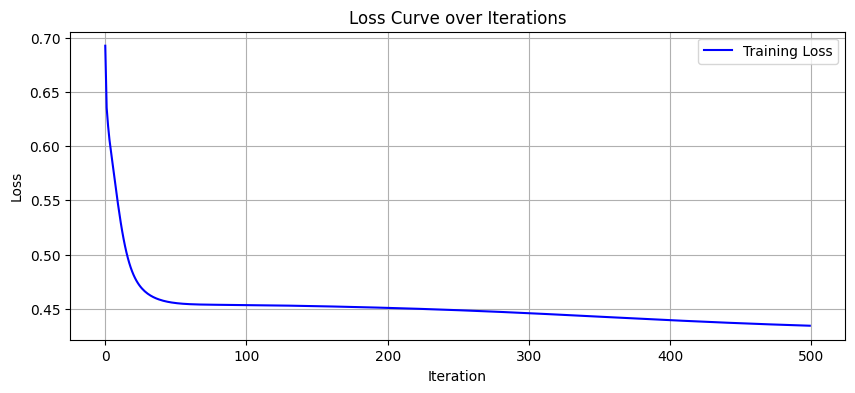

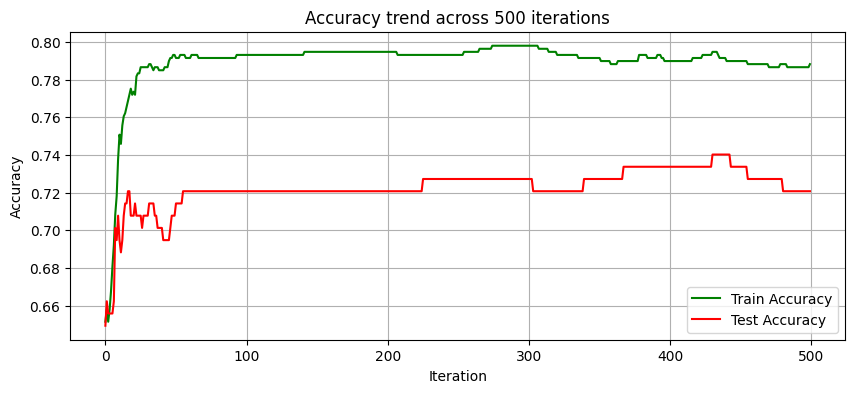

In [46]:
model_progress = MLPClassifier(
    hidden_layer_sizes=(50,),
    activation='logistic',
    solver='sgd',
    learning_rate_init=0.1,
    max_iter=1,
    warm_start=True,
    random_state=42
)

train_acc_list = []
test_acc_list = []
loss_list = []

epochs = 500
for i in range(epochs):
    model_progress.fit(X_train_scaled, y_train)
    y_train_pred = model_progress.predict(X_train_scaled)
    y_test_pred = model_progress.predict(X_test_scaled)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    loss = model_progress.loss_

    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    loss_list.append(loss)

plt.figure(figsize=(10,4))
plt.plot(loss_list, label='Training Loss', color='blue')
plt.title("Loss Curve over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(train_acc_list, label='Train Accuracy', color='green')
plt.plot(test_acc_list, label='Test Accuracy', color='red')
plt.title("Accuracy trend across 500 iterations")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

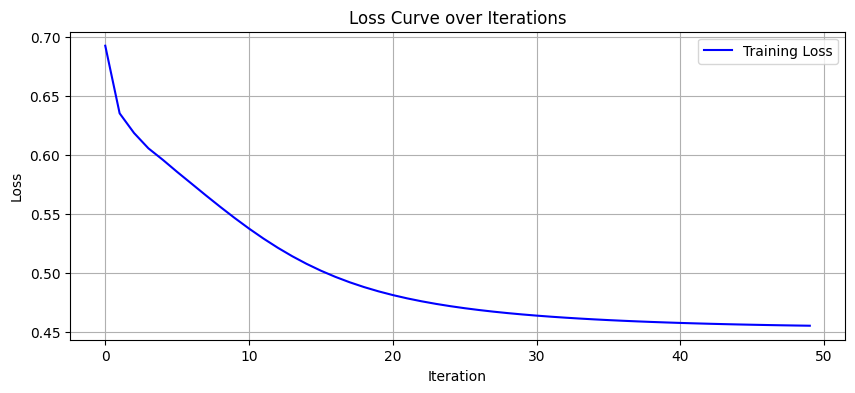

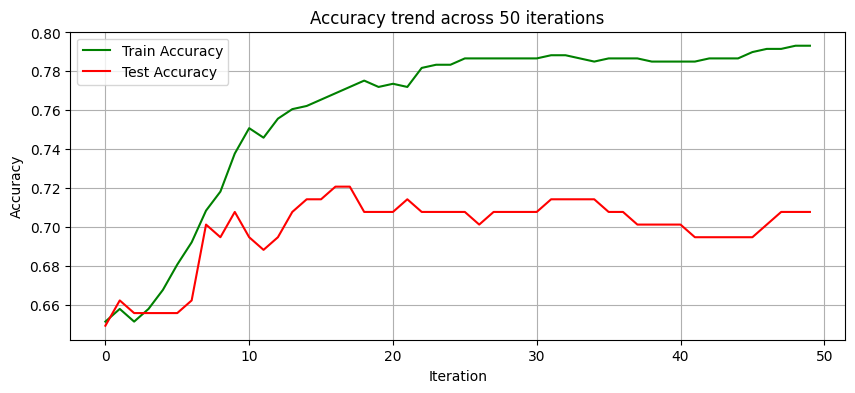

In [47]:
model_progress = MLPClassifier(
    hidden_layer_sizes=(50,),
    activation='logistic',
    solver='sgd',
    learning_rate_init=0.1,
    max_iter=1,
    warm_start=True,
    random_state=42
)

train_acc_list = []
test_acc_list = []
loss_list = []

epochs = 50
for i in range(epochs):
    model_progress.fit(X_train_scaled, y_train)
    y_train_pred = model_progress.predict(X_train_scaled)
    y_test_pred = model_progress.predict(X_test_scaled)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    loss = model_progress.loss_

    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    loss_list.append(loss)

plt.figure(figsize=(10,4))
plt.plot(loss_list, label='Training Loss', color='blue')
plt.title("Loss Curve over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(train_acc_list, label='Train Accuracy', color='green')
plt.plot(test_acc_list, label='Test Accuracy', color='red')
plt.title("Accuracy trend across 50 iterations")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

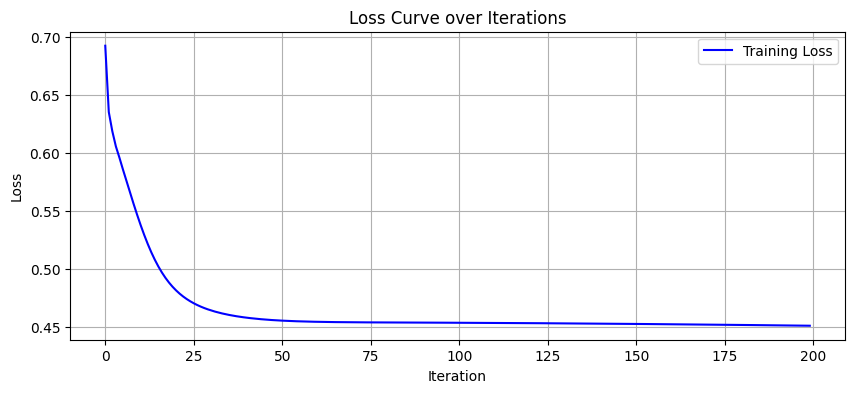

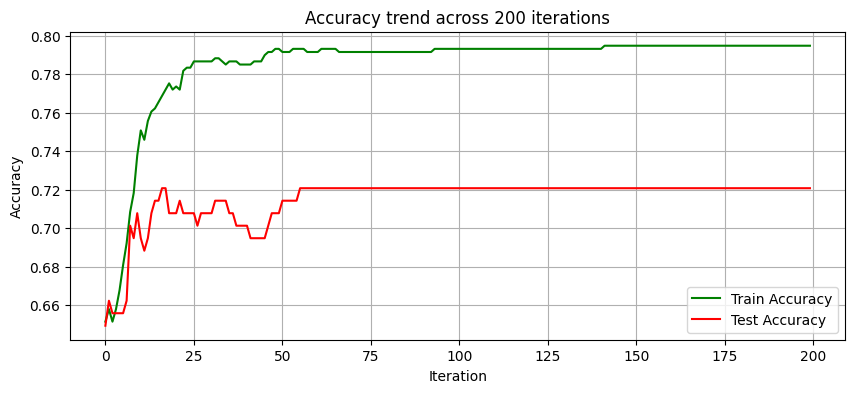

In [48]:
model_progress = MLPClassifier(
    hidden_layer_sizes=(50,),
    activation='logistic',
    solver='sgd',
    learning_rate_init=0.1,
    max_iter=1,
    warm_start=True,
    random_state=42
)

train_acc_list = []
test_acc_list = []
loss_list = []

epochs = 200
for i in range(epochs):
    model_progress.fit(X_train_scaled, y_train)
    y_train_pred = model_progress.predict(X_train_scaled)
    y_test_pred = model_progress.predict(X_test_scaled)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    loss = model_progress.loss_

    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    loss_list.append(loss)

plt.figure(figsize=(10,4))
plt.plot(loss_list, label='Training Loss', color='blue')
plt.title("Loss Curve over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(train_acc_list, label='Train Accuracy', color='green')
plt.plot(test_acc_list, label='Test Accuracy', color='red')
plt.title("Accuracy trend across 200 iterations")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Neuron Count | Iterations | Train Accuracy | Test Accuracy
100           | 50         | 0.7850         | 0.7338        
100           | 250        | 0.7915         | 0.7078        
100           | 500        | 0.7915         | 0.7078        
150           | 50         | 0.7948         | 0.6948        
150           | 250        | 0.7948         | 0.6948        
150           | 500        | 0.7948         | 0.6948        
200           | 50         | 0.7818         | 0.7338        
200           | 250        | 0.7818         | 0.7338        
200           | 500        | 0.7818         | 0.7338        


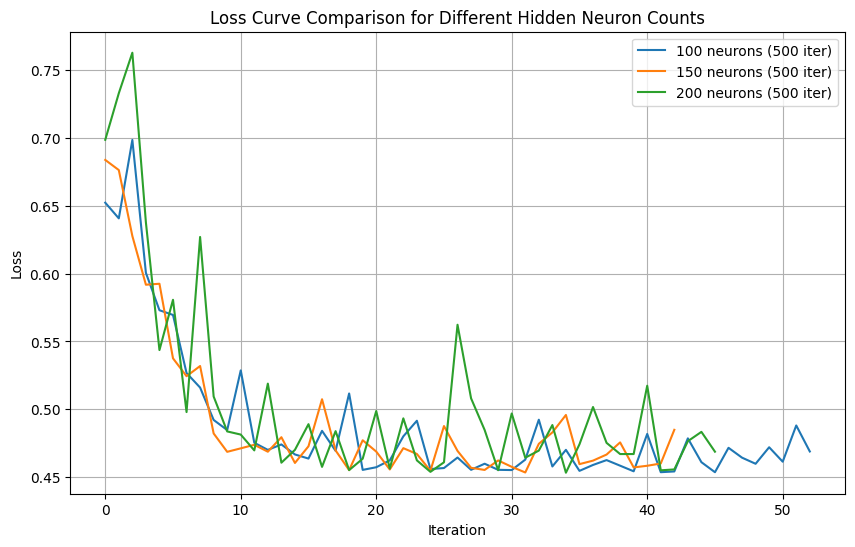

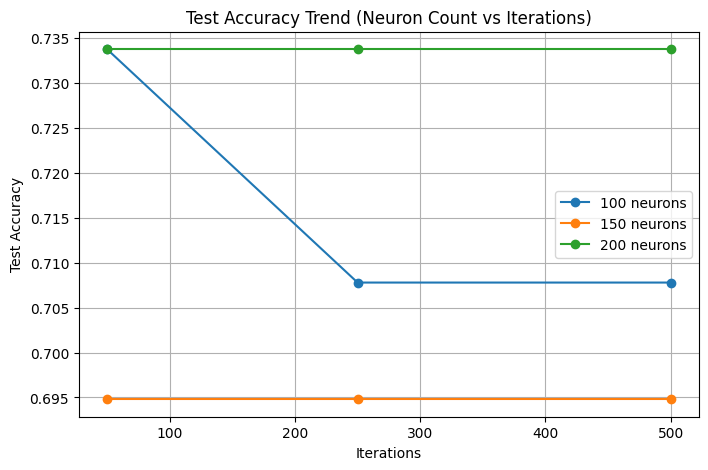

In [49]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

neuron_counts = [100, 150, 200]
iteration_values = [50, 250, 500]

results = {}
loss_curves = {}

for neurons in neuron_counts:
    results[neurons] = []
    loss_curves[neurons] = {}

    for iters in iteration_values:
        model = MLPClassifier(
            hidden_layer_sizes=(neurons,),
            activation='logistic',
            solver='sgd',
            learning_rate_init=0.1,
            max_iter=iters,
            random_state=42
        )
        model.fit(X_train_scaled, y_train)

        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)

        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)

        results[neurons].append((iters, train_acc, test_acc))
        loss_curves[neurons][iters] = model.loss_curve_

print("Neuron Count | Iterations | Train Accuracy | Test Accuracy")
for neurons in neuron_counts:
    for iters, train_acc, test_acc in results[neurons]:
        print(f"{neurons:<13} | {iters:<10} | {train_acc:<14.4f} | {test_acc:<14.4f}")

plt.figure(figsize=(10,6))
for neurons in neuron_counts:
    plt.plot(loss_curves[neurons][500], label=f'{neurons} neurons (500 iter)')
plt.title("Loss Curve Comparison for Different Hidden Neuron Counts")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
for neurons in neuron_counts:
    test_acc_values = [acc[2] for acc in results[neurons]]
    plt.plot(iteration_values, test_acc_values, marker='o', label=f'{neurons} neurons')
plt.title("Test Accuracy Trend (Neuron Count vs Iterations)")
plt.xlabel("Iterations")
plt.ylabel("Test Accuracy")
plt.legend()
plt.grid(True)
plt.show()


1 hidden layer -> Train Accuracy: 0.7980, Test Accuracy: 0.7078
2 hidden layers -> Train Accuracy: 0.7964, Test Accuracy: 0.7208


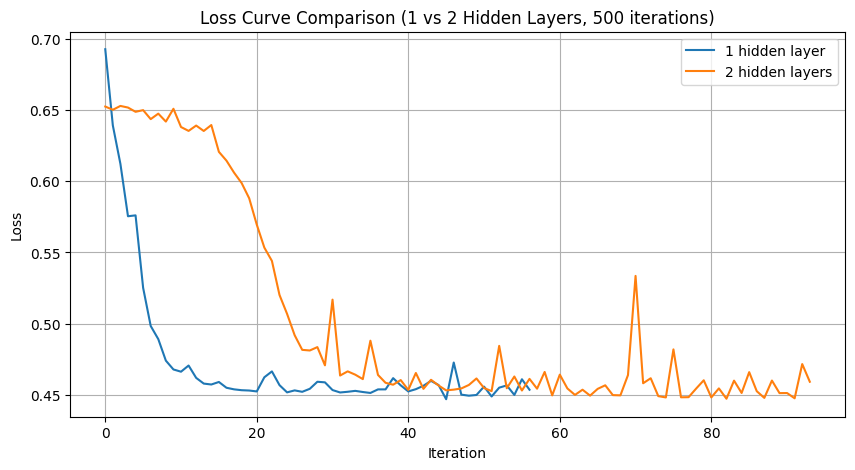

In [50]:
layer_configs = {
    "1 hidden layer": (50,),
    "2 hidden layers": (50, 50)
}

results = {}
loss_curves = {}

for label, config in layer_configs.items():
    model = MLPClassifier(
        hidden_layer_sizes=config,
        activation='logistic',
        solver='sgd',
        learning_rate_init=0.1,
        max_iter=500,
        random_state=42
    )
    model.fit(X_train_scaled, y_train)

    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    results[label] = (train_acc, test_acc)
    loss_curves[label] = model.loss_curve_

for label in results:
    print(f"{label} Train Accuracy: {results[label][0]:.4f}, Test Accuracy: {results[label][1]:.4f}")

plt.figure(figsize=(10,5))
for label in layer_configs:
    plt.plot(loss_curves[label], label=label)
plt.title("Loss Curve Comparison (1 vs 2 Hidden Layers, 500 iterations)")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

In [51]:
from sklearn.model_selection import GridSearchCV, KFold

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,), (200,)],
    'max_iter': [50, 250, 500]
}

mlp = MLPClassifier(
    activation='logistic',
    solver='sgd',
    learning_rate_init=0.1,
    random_state=42
)

cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# Detailed summary
results = grid_search.cv_results_
for mean, std, params in zip(results['mean_test_score'], results['std_test_score'], results['params']):
    print(f"{params} -> Mean CV Accuracy: {mean:.4f}, Std: {std:.4f}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'hidden_layer_sizes': (50,), 'max_iter': 50}
Best Cross-Validation Accuracy: 0.7915
{'hidden_layer_sizes': (50,), 'max_iter': 50} -> Mean CV Accuracy: 0.7915, Std: 0.0312
{'hidden_layer_sizes': (50,), 'max_iter': 250} -> Mean CV Accuracy: 0.7833, Std: 0.0358
{'hidden_layer_sizes': (50,), 'max_iter': 500} -> Mean CV Accuracy: 0.7817, Std: 0.0380
{'hidden_layer_sizes': (100,), 'max_iter': 50} -> Mean CV Accuracy: 0.7882, Std: 0.0332
{'hidden_layer_sizes': (100,), 'max_iter': 250} -> Mean CV Accuracy: 0.7899, Std: 0.0364
{'hidden_layer_sizes': (100,), 'max_iter': 500} -> Mean CV Accuracy: 0.7899, Std: 0.0364
{'hidden_layer_sizes': (150,), 'max_iter': 50} -> Mean CV Accuracy: 0.7736, Std: 0.0508
{'hidden_layer_sizes': (150,), 'max_iter': 250} -> Mean CV Accuracy: 0.7850, Std: 0.0398
{'hidden_layer_sizes': (150,), 'max_iter': 500} -> Mean CV Accuracy: 0.7850, Std: 0.0398
{'hidden_layer_sizes': (200,), 'max_iter':

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


LR=0.01 → Train Accuracy: 0.7997, Test Accuracy: 0.6948
LR=0.05 → Train Accuracy: 0.7932, Test Accuracy: 0.7078
LR=0.1 → Train Accuracy: 0.7980, Test Accuracy: 0.7078


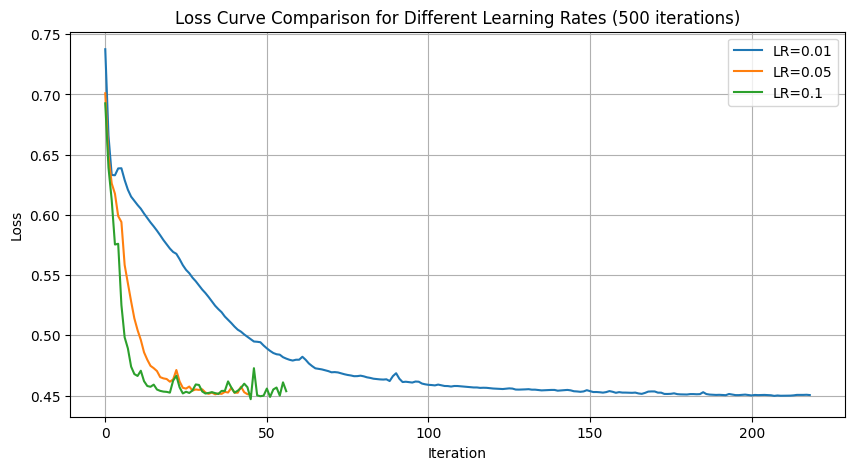

In [52]:
learning_rates = [0.01, 0.05, 0.1]
results_lr = {}
loss_curves_lr = {}

for lr in learning_rates:
    model = MLPClassifier(
        hidden_layer_sizes=(50,),
        activation='logistic',
        solver='sgd',
        learning_rate_init=lr,
        max_iter=500,
        random_state=42
    )
    model.fit(X_train_scaled, y_train)

    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    results_lr[lr] = (train_acc, test_acc)
    loss_curves_lr[lr] = model.loss_curve_

for lr, accs in results_lr.items():
    print(f"LR={lr} → Train Accuracy: {accs[0]:.4f}, Test Accuracy: {accs[1]:.4f}")

plt.figure(figsize=(10,5))
for lr in learning_rates:
    plt.plot(loss_curves_lr[lr], label=f"LR={lr}")
plt.title("Loss Curve Comparison for Different Learning Rates (500 iterations)")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()